## Topics Covered
1) Linear Regression
2) Ridge and Lasso 
3) Logistic Regression
4) Decision Tree
5) KMeans Clustering Algorithm

#House Pricing DataSet

In [3]:
from sklearn.datasets import fetch_california_housing

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = fetch_california_housing()

In [6]:
type(df)

sklearn.utils._bunch.Bunch

In [8]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
print(dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [9]:
dataset["Price"]= df.target

In [10]:
#Price is dependent feature for linear regression
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [63]:
## Dividing the dataset into independent and dependent Features
x = dataset.iloc[:,:-1] ##independent features
y = dataset.iloc[:,-1] ##dependent feature

In [66]:
from sklearn.model_selection import train_test_split
#33% for test and 67% for train
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)


In [ ]:
#testing data is for evaluation and trianing data is for learning 

In [18]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score #Taking different for training and testing

lin_reg = LinearRegression()
mse= cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(mse)
mean_mse = np.mean(mse)
print(mean_mse)
lin_reg.fit(x,y)

[-0.54099828 -0.49871687 -0.50480739 -0.5200183  -0.55070903]
-0.5230499763383931


LinearRegression()

In [17]:
predictions  = lin_reg.predict(x)
predictions
#cost function should be as lower as it can 

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [ ]:
#Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#hyper parameter tuning
ridge = Ridge()

params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [21]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.5230499763383933


In [ ]:
#Lasso Regression

Note: Take value which is closer to zero because we have used neg_mean_squared_error

In [60]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#hyper parameter tuning
lasso = Lasso()
# Increase max_iter to help convergence
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X_train,y_train)

In [25]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.5230499762350409


In [30]:
y_pred=lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
r2

0.33957426835773474

In [ ]:
#Logistic Regression

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.datasets import load_breast_cancer
df =  load_breast_cancer()
#independent Features
X = pd.DataFrame(df["data"],columns=df["feature_names"])
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [59]:
#dependent features
y=pd.DataFrame(df["target"],columns=["target"])

In [40]:
y.value_counts()
## It is a Balanced dataset 

target
1         357
0         212
Name: count, dtype: int64

In [ ]:
#l1 norm and l2 norm are also present in logistic regression

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)
params=[{"C":[1,5,10]},{"max_iter":[100,150]}]

In [45]:
model1 = LogisticRegression(C=100,max_iter=100)

In [58]:
model = GridSearchCV(model1,param_grid=params,scoring="f1")
#f1 scoring is nothing but performance metrics
model.fit(X_train,y_train)

In [48]:
model.best_params_
model.best_score_

0.9558624887109136

In [50]:
y_pred = model.predict(X_test)
#predict = 1 if sigmoid output ≥ 0.5 else 0

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
confusion_matrix(y_pred,y_test)

array([[ 64,   3],
       [  3, 118]], dtype=int64)

In [56]:
accuracy_score(y_test,y_pred)

0.9680851063829787

In [57]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96        67\n           1       0.98      0.98      0.98       121\n\n    accuracy                           0.97       188\n   macro avg       0.97      0.97      0.97       188\nweighted avg       0.97      0.97      0.97       188\n'

In [ ]:
#Decision Tree

In [1]:
from sklearn.datasets import load_iris

In [27]:
iris=load_iris()
# iris


In [12]:
# iris.data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
classifier = DecisionTreeClassifier()
classifier.fit(iris.data,iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

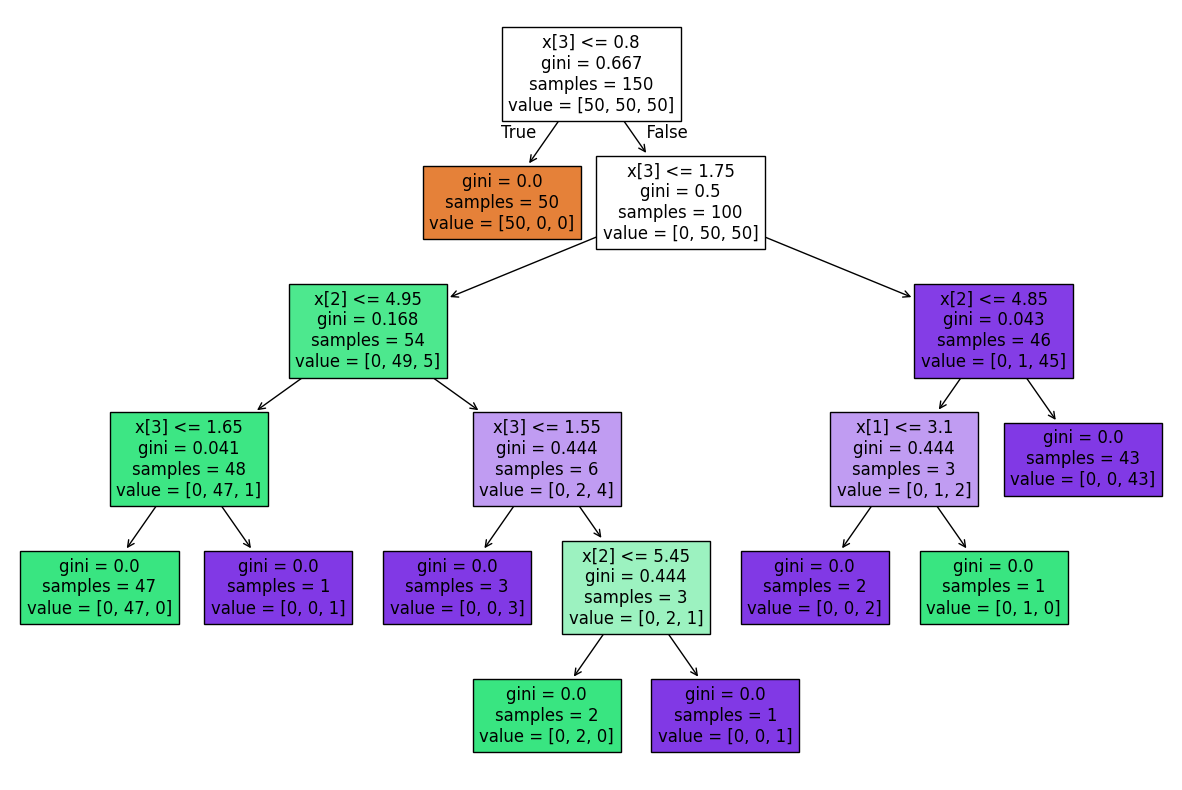

In [15]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

Performance Metrics Clustering Silhoutter Coefficient 

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [23]:
#Generating sample data from make_blobs
#This particular setting has one distinct cluster,and 3 clusters placed close together
x,y = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=1)
#This is for Reproducibility
range_n_clusters = [2,3,4,5,6]

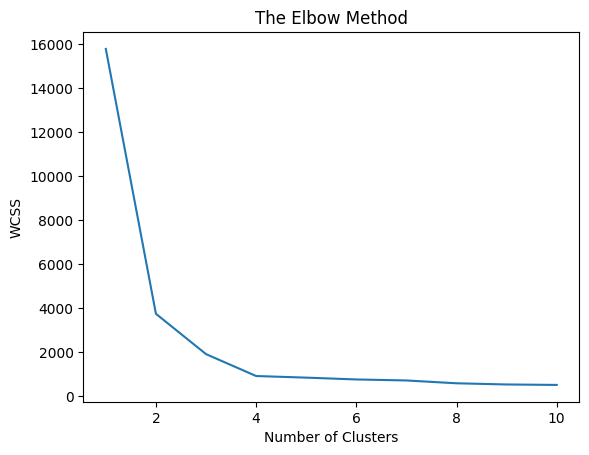

In [28]:
from sklearn.cluster import KMeans
#within cluser sum of squares

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)#distance between centroids and the points
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()  

In [ ]:
#since from 4 onwards we got abrupt change we may assuem from 4 the number of clusters formed

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


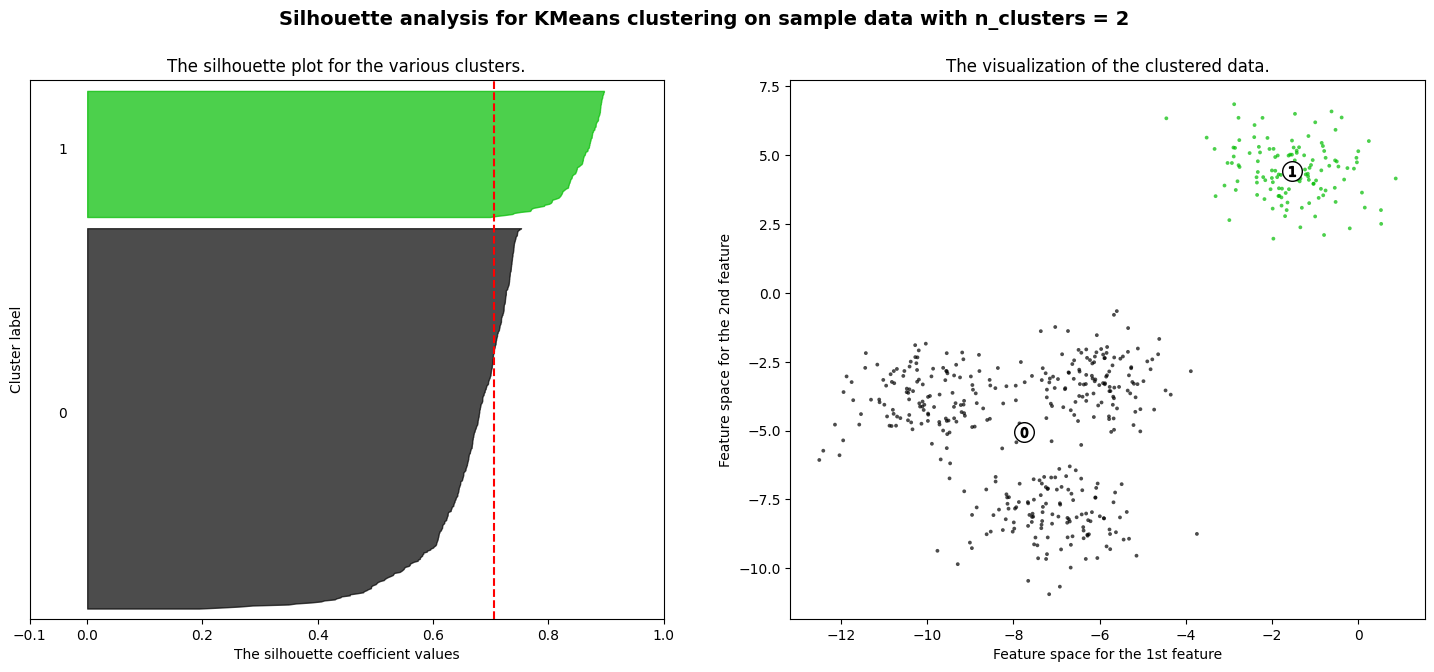

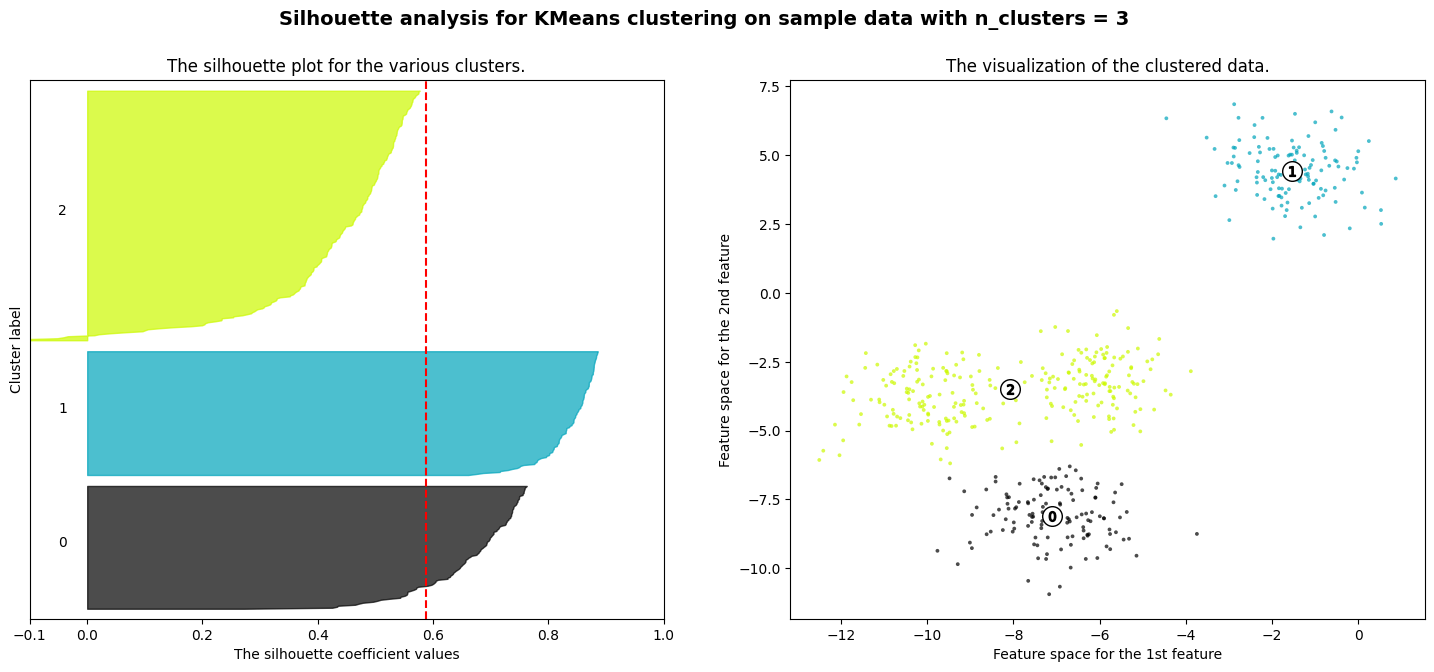

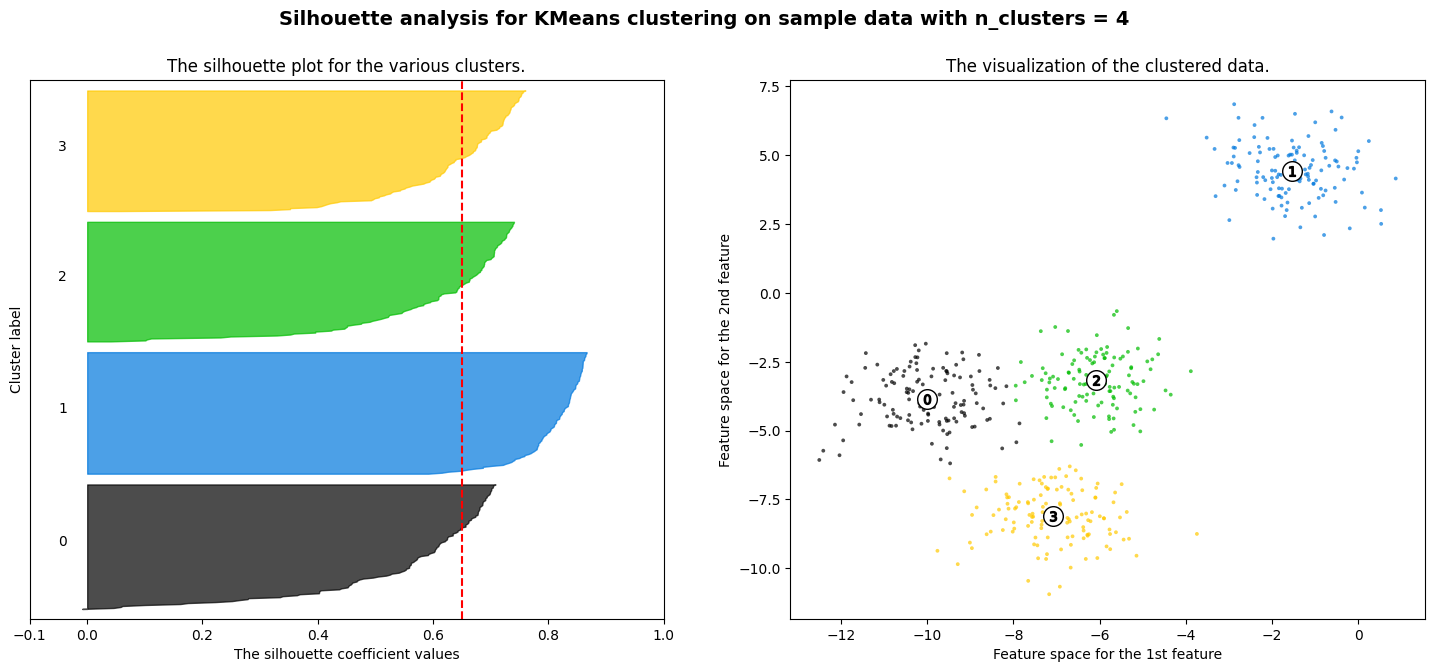

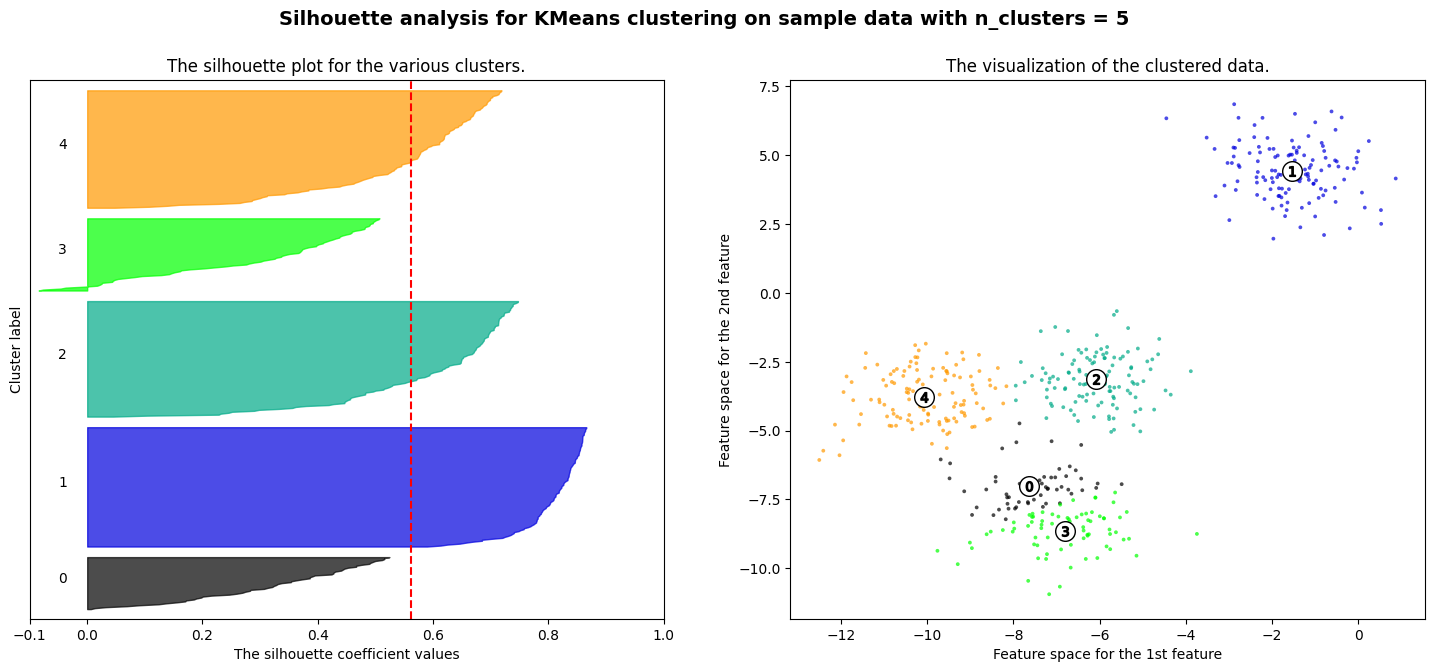

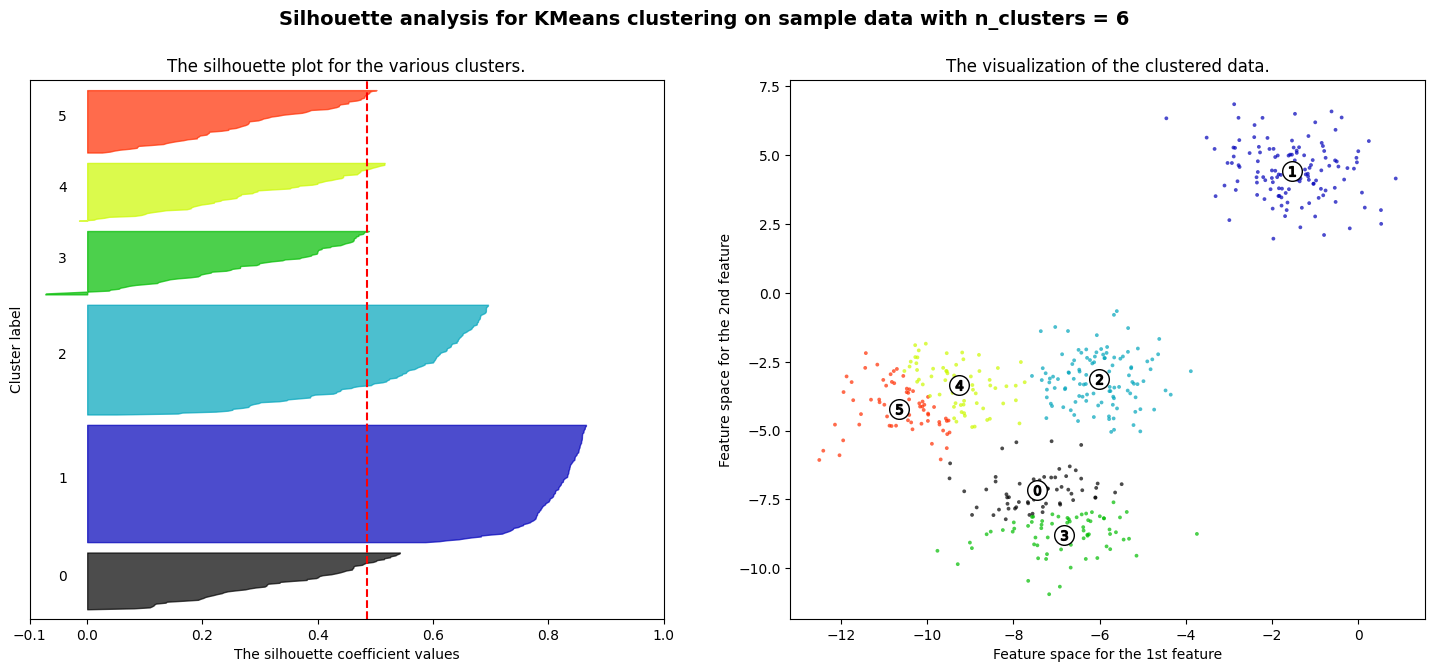

In [30]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()